# Introduction to Keras

Thomas Boquet: [@tboquet](https://github.com/tboquet) on github

##### 1. How to choose a deep learning library?
##### 2. Libraries landscape
##### 3. What is Keras?
##### 4. Why Keras?
##### 5. Sequential API
##### 6. Functionnal API
##### 7. Conclusion
##### 8. Other ressources

# How to choose a deep learning library?

Before:

- be familiar with the underlying concepts covered by the tool
- think about your goals (research, production, learning) 

Main concerns:

- supported and used by a lot of people
- already in production in some companies
- will be alive for several years
- active contributors


# Libraries landscape

- [Lasagne](https://github.com/Lasagne/Lasagne) ([Theano](https://github.com/Theano/Theano))
- [Blocks](https://github.com/mila-udem/blocks) ([Theano](https://github.com/Theano/Theano))
- [Pretty tensor](https://github.com/google/prettytensor) ([TensorFlow](https://github.com/tensorflow/tensorflow))
- [Skflow](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/learn/python/learn) ([TensorFlow](https://github.com/tensorflow/tensorflow))
- [MxNet](https://github.com/dmlc/mxnet) (MxNet backend)
- [Cunn](https://github.com/torch/cunn), [nn](https://github.com/torch/nn), [autograd](https://github.com/twitter/torch-autograd), [optim]() ([Torch](https://github.com/torch), [CuTorch](https://github.com/torch))
- etc.

# What is Keras? 

- "Keras is a high-level neural networks library, written in Python and capable of running on top of either TensorFlow or Theano"
- different from Theano, Tensorflow, Neon
- Keras has its own backend wrapping these 2 libraries
- shorten length between ideas and results, implementation and production

# Tensorflow Backend

In [1]:
def dot(x, y):
    '''Multiplies 2 tensors.
    When attempting to multiply a ND tensor
    with a ND tensor, reproduces the Theano behavior
    (e.g. (2, 3).(4, 3, 5) = (2, 4, 5))
    '''
    if ndim(x) is not None and (ndim(x) > 2 or ndim(y) > 2):
        x_shape = (-1,) + int_shape(x)[1:]
        y_shape = int_shape(y)
        y_permute_dim = list(range(ndim(y)))
        y_permute_dim = [y_permute_dim.pop(-2)] + y_permute_dim
        xt = tf.reshape(x, [-1, x_shape[-1]])
        yt = tf.reshape(tf.transpose(y, perm=y_permute_dim), [y_shape[-2], -1])
        return tf.reshape(tf.matmul(xt, yt), x_shape[:-1] + y_shape[:-2] + y_shape[-1:])
    if is_sparse(x):
        out = tf.sparse_tensor_dense_matmul(x, y)
    else:
        out = tf.matmul(x, y)
    return out

# Theano Backend 

In [2]:
def dot(x, y):
    if is_sparse(x):
        return th_sparse_module.basic.structured_dot(x, y)
    else:
        return T.dot(x, y)

# Why Keras?

- simple torch like syntax
- functionnal api (flexible)
- lots of examples and projects built with Keras
- research and production ready
- built-in tools (model and parameters serialization, callbacks, etc.)
- easily abstract ideas

# Sequential API

In [3]:
from keras import backend as K
import tensorflow as tf
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
K.set_session(session)

Using TensorFlow backend.


In [4]:
from keras.models import Sequential

In [5]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 128
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

input_shape = (img_rows, img_cols, 1)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)



X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## MLP 

In [6]:
X_train_f = X_train.reshape(-1, 28 * 28)
X_test_f = X_test.reshape(-1, 28 * 28)

mlp = Sequential()
mlp.add(Dense(512, input_shape=(28 * 28,), name="hidden_layer_1"))
mlp.add(Dense(256, input_shape=(28 * 28,), name="hidden_layer_2"))
mlp.add(Dense(10, input_shape=(28 * 28,), name="output_layer"))
mlp.add(Activation('softmax'))
mlp.compile(loss='categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])

In [7]:
from IPython.display import Image
from keras.utils.visualize_util import model_to_dot

def vizu_model(model):
    return Image(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='png'))

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



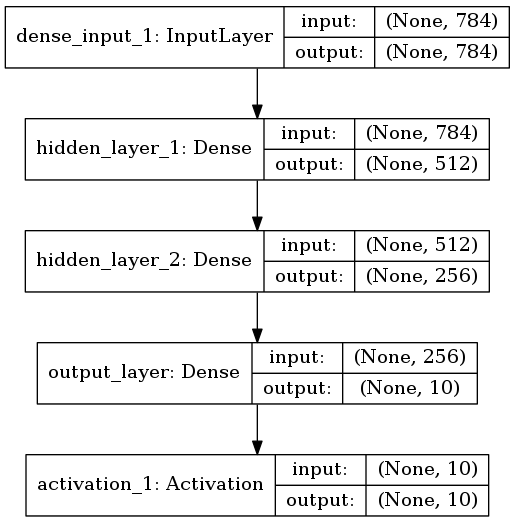

In [8]:
vizu_model(mlp)

In [9]:
hist_mlp = mlp.fit(X_train_f, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
                   verbose=1, validation_data=(X_test_f, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.7017 - acc: 0.8229 - val_loss: 0.4197 - val_acc: 0.8881
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.4025 - acc: 0.8896 - val_loss: 0.3514 - val_acc: 0.9020
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.3578 - acc: 0.8989 - val_loss: 0.3249 - val_acc: 0.9079
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.3365 - acc: 0.9048 - val_loss: 0.3107 - val_acc: 0.9129
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.3232 - acc: 0.9085 - val_loss: 0.3046 - val_acc: 0.9137


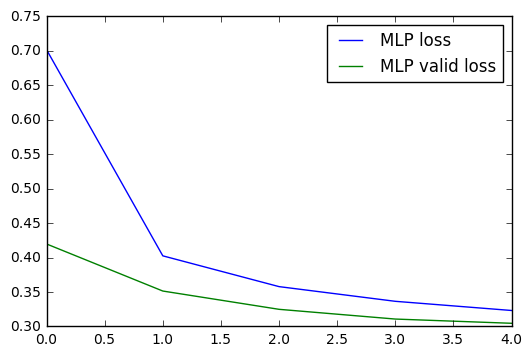

In [10]:
plt.plot(hist_mlp.history['loss'], label='MLP loss')
plt.plot(hist_mlp.history['val_loss'], label='MLP valid loss')
plt.legend()
plt.show()

# Convnet 

In [11]:
convnet = Sequential()

convnet.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
convnet.add(Activation('relu'))
convnet.add(MaxPooling2D(pool_size=pool_size))
convnet.add(Dropout(0.25))

convnet.add(Flatten())
convnet.add(Dense(128))
convnet.add(Activation('relu'))
convnet.add(Dropout(0.5))
convnet.add(Dense(nb_classes))
convnet.add(Activation('softmax'))

convnet.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



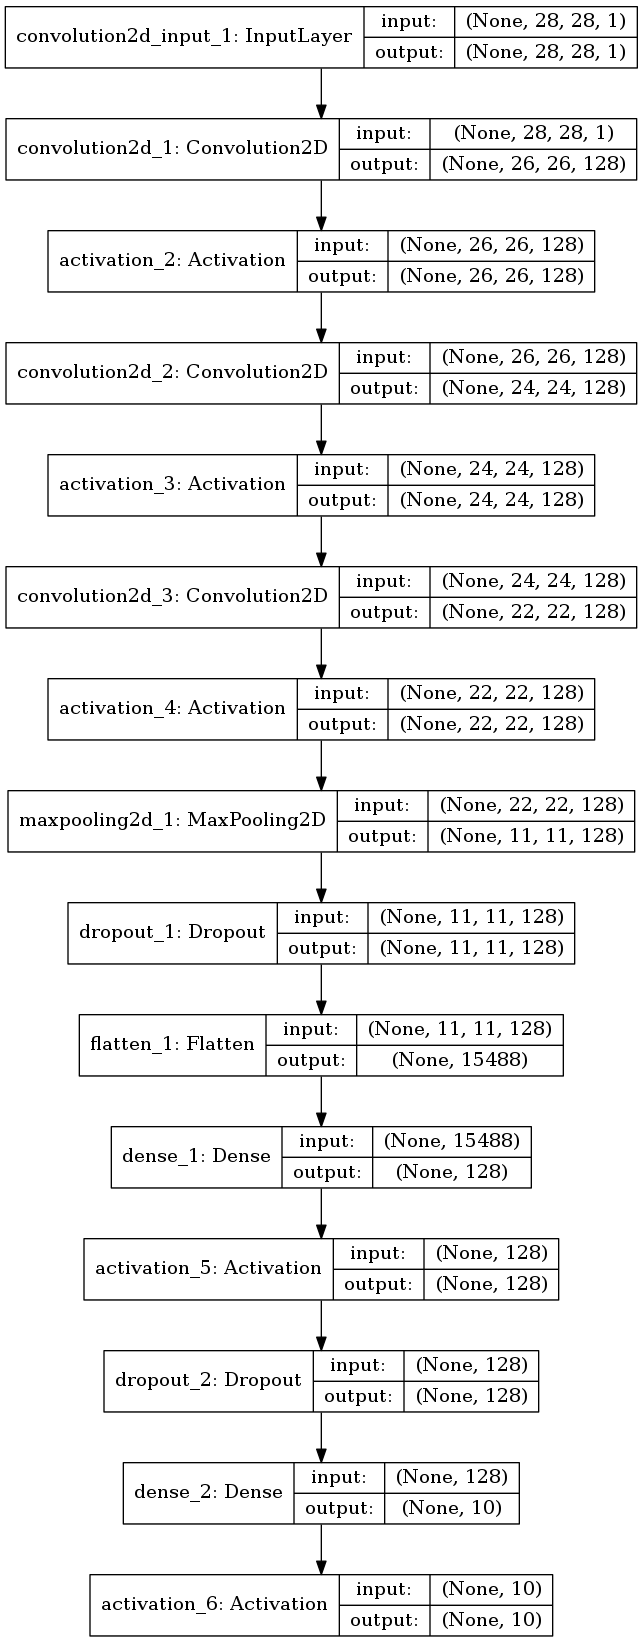

In [13]:
vizu_model(convnet)

In [14]:
from keras.callbacks import TensorBoard

tsb = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=False)

hist_convnet = convnet.fit(X_train[:, :, :, None], Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
                      verbose=1, validation_data=(X_test[:1000, :, :, None], Y_test[:1000]), callbacks=[tsb])
# history_convnet = convnet.fit(X_train[:, :, :, None], Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
#                       verbose=1, validation_data=(X_test[:1000, :, :, None], Y_test[:1000]), callbacks=[tsb], initial_epoch=nb_epoch)

Train on 60000 samples, validate on 1000 samples
Epoch 1/5
60000/60000 [==============================] - 28s - loss: 1.9947 - acc: 0.3118 - val_loss: 0.5460 - val_acc: 0.8450
Epoch 2/5
60000/60000 [==============================] - 25s - loss: 0.5152 - acc: 0.8409 - val_loss: 0.2682 - val_acc: 0.9040
Epoch 3/5
60000/60000 [==============================] - 25s - loss: 0.3791 - acc: 0.8841 - val_loss: 0.2134 - val_acc: 0.9270
Epoch 4/5
60000/60000 [==============================] - 26s - loss: 0.3277 - acc: 0.9019 - val_loss: 0.1773 - val_acc: 0.9400
Epoch 5/5
60000/60000 [==============================] - 26s - loss: 0.2999 - acc: 0.9090 - val_loss: 0.1616 - val_acc: 0.9470


## TensorBoard 

![insert_png_here](anim.gif)

# Functionnal API 

In [16]:
from keras.models import Model
from keras.layers import Input

In [17]:
# Feature extractor

conv_1 = Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='same',
                        input_shape=input_shape)
act_1 = Activation('relu')
conv_2 = Convolution2D(nb_filters / 2, kernel_size[0], kernel_size[1],
                      border_mode='same',)
act_2 = Activation('relu')

mp = MaxPooling2D(pool_size=pool_size)
do_1 = Dropout(0.25)

In [18]:
# MLP classifier

fl = Flatten()
dense_1 = Dense(128)
act_1 = Activation('relu')
do_2 = Dropout(0.5)
dense_out = Dense(nb_classes)
out_act = Activation('softmax')

In [19]:
def make_model(input_shape, layers, name):
    inputs = Input(shape=input_shape)
    x = layers[0](inputs)
    for layer in layers[1:]:
        x = layer(x)
    return Model(inputs, x, name=name)
    

In [20]:
# Build features extractor Model

features_extractor = make_model(input_shape, [conv_1, act_1, conv_2, act_2, mp, do_1], 'Feature_extractor')

print('Input shape: {}'.format(features_extractor.input_shape))
print('Output shape: {}'.format(features_extractor.output_shape))

p_0 = features_extractor.predict(X_train[:3][:, :, :, None])

Input shape: (None, 28, 28, 1)
Output shape: (None, 14, 14, 64)


In [21]:
features_extractor.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 28, 28, 128)   1280        input_1[0][0]                    
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 28, 28, 128)   0           convolution2d_4[0][0]            
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 28, 28, 64)    73792       activation_9[0][0]               
___________________________________________________________________________________________

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



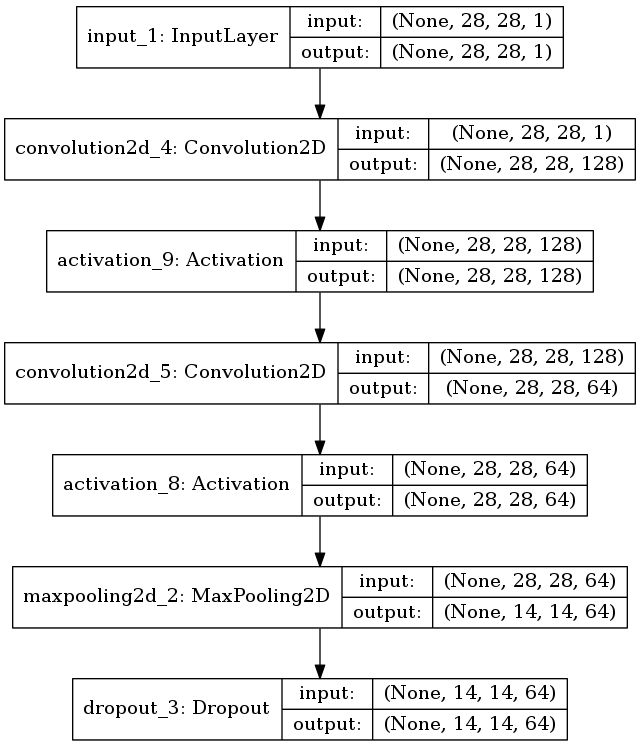

In [22]:
vizu_model(features_extractor)

In [23]:
import numpy.ma as ma
import matplotlib.cm as cm

def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    imgs = np.rollaxis(imgs, 2, 0)
    im_shape = imgs.shape
    imgs = imgs.reshape(-1, im_shape[1], im_shape[2])
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around plt.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im, cax=cax)

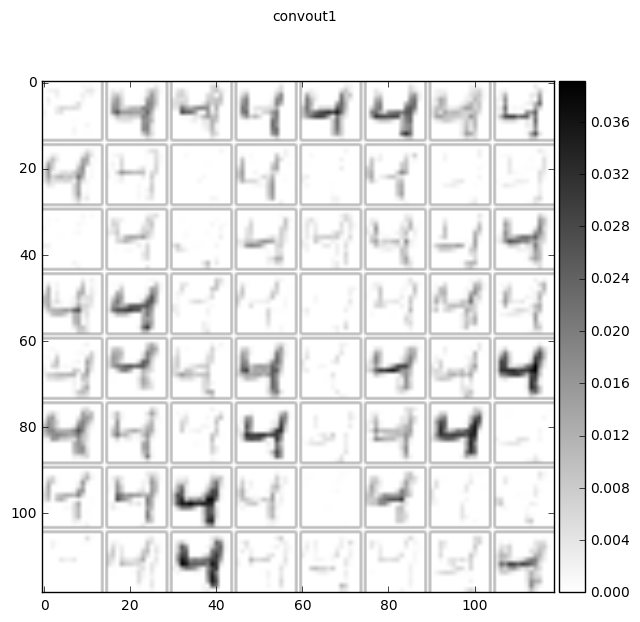

In [24]:
plt.figure(figsize=(7, 7))
plt.suptitle('convout1')
nice_imshow(plt.gca(), make_mosaic(p_0[2], 8, 8), cmap=cm.binary)
plt.show()

In [25]:
# Build classifier Model

cl_input_shape = features_extractor.output_shape[1:]
classifier = make_model(cl_input_shape, [fl, dense_1, act_1, do_2, dense_out, out_act], 'Classifier')

print('Input shape: {}'.format(classifier.input_shape))
print('Output shape: {}'.format(classifier.output_shape))

Input shape: (None, 14, 14, 64)
Output shape: (None, 10)


In [26]:
# Build final Model
inputs_stacked = Input(shape=input_shape, name='inputs_stacked')

x = features_extractor(inputs_stacked)
y = classifier(x)

stacked_model = Model(inputs_stacked, y)

In [27]:
stacked_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
inputs_stacked (InputLayer)      (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
Feature_extractor (Model)        (None, 14, 14, 64)    75072       inputs_stacked[0][0]             
____________________________________________________________________________________________________
Classifier (Model)               (None, 10)            1607050     Feature_extractor[1][0]          
Total params: 1682122
____________________________________________________________________________________________________


Fontconfig warning: ignoring C.UTF-8: not a valid language tag



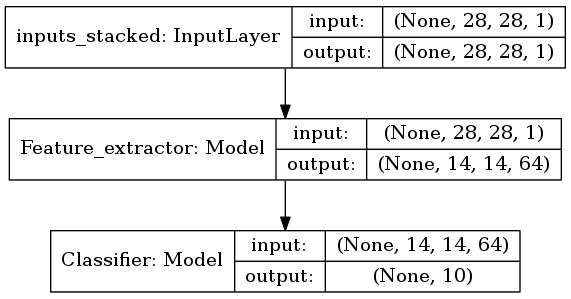

In [28]:
vizu_model(stacked_model)

In [29]:
stacked_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
hist_stacked_model = stacked_model.fit(X_train[:, :, :, None], Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
                      verbose=1, validation_data=(X_test[:1000, :, :, None], Y_test[:1000]))

Train on 60000 samples, validate on 1000 samples
Epoch 1/5
60000/60000 [==============================] - 13s - loss: 1.2623 - acc: 0.5960 - val_loss: 0.3800 - val_acc: 0.8850
Epoch 2/5
60000/60000 [==============================] - 12s - loss: 0.4619 - acc: 0.8578 - val_loss: 0.2630 - val_acc: 0.9110
Epoch 3/5
60000/60000 [==============================] - 13s - loss: 0.3764 - acc: 0.8863 - val_loss: 0.2122 - val_acc: 0.9270
Epoch 4/5
60000/60000 [==============================] - 13s - loss: 0.3352 - acc: 0.8986 - val_loss: 0.1832 - val_acc: 0.9320
Epoch 5/5
60000/60000 [==============================] - 13s - loss: 0.3063 - acc: 0.9069 - val_loss: 0.1696 - val_acc: 0.9450


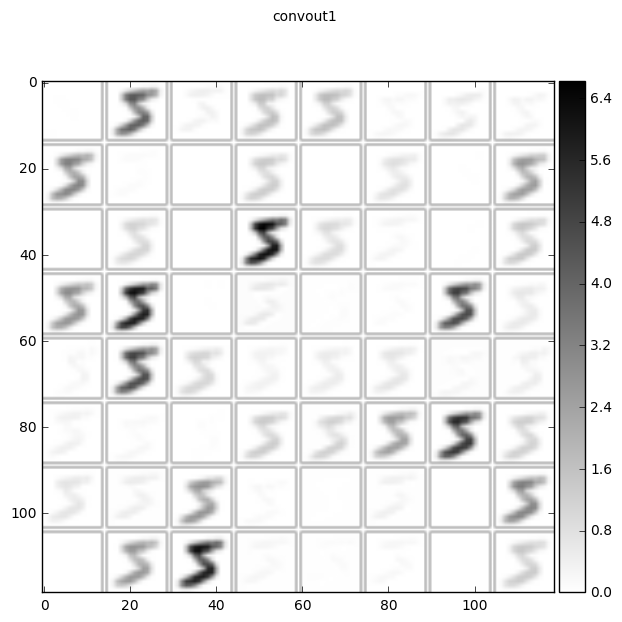

In [30]:
p_0 = features_extractor.predict(X_train[:3][:, :, :, None])
plt.figure(figsize=(7, 7))
plt.suptitle('convout1')
nice_imshow(plt.gca(), make_mosaic(p_0[0], 8, 8), cmap=cm.binary)
plt.show()

# Reusable parts 

- "new" problem: is the digit > than 2?

In [31]:
sup_two_train = y_train > 2
sup_two_train = sup_two_train.astype(np.int32)
sup_two_test = y_test > 2
sup_two_test = sup_two_test.astype(np.int32)

In [32]:
# Build a second classifier

fl_sup_two = Flatten()
dense_sup_two = Dense(128)
act_sup_two = Activation('relu')
do_sup_two = Dropout(0.5)
dense_out_sup_two = Dense(1)
out_act_sup_two = Activation('sigmoid')
layers = [fl_sup_two, dense_sup_two, act_sup_two, 
          do_sup_two, dense_out_sup_two, out_act_sup_two]
classifier_2 = make_model(cl_input_shape, layers, 'Classifier_2')

In [56]:
classifier_2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 14, 14, 64)    0                                            
____________________________________________________________________________________________________
flatten_3 (Flatten)              (None, 12544)         0           input_3[0][0]                    
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 128)           1605760     flatten_3[0][0]                  
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 128)           0           dense_5[0][0]                    
___________________________________________________________________________________________

In [34]:
# Build the multi output model

inputs_multi_output = Input(shape=input_shape, name='input_multi_out')

features_extractor.trainable = False

x = features_extractor(inputs_multi_output)
y_1 = classifier(x)
y_2 = classifier_2(x)

stacked_model_multi_out = Model(inputs_multi_output, [y_1, y_2])

stacked_model_multi_out.compile(loss=['categorical_crossentropy', 'binary_crossentropy'],
              optimizer='sgd',
              metrics=['accuracy'])

In [35]:
stacked_model_multi_out.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_multi_out (InputLayer)     (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
Feature_extractor (Model)        (None, 14, 14, 64)    75072       input_multi_out[0][0]            
____________________________________________________________________________________________________
Classifier (Model)               (None, 10)            1607050     Feature_extractor[2][0]          
____________________________________________________________________________________________________
Classifier_2 (Model)             (None, 1)             1605889     Feature_extractor[2][0]          
Total params: 3288011
_____________________________________________________________________

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



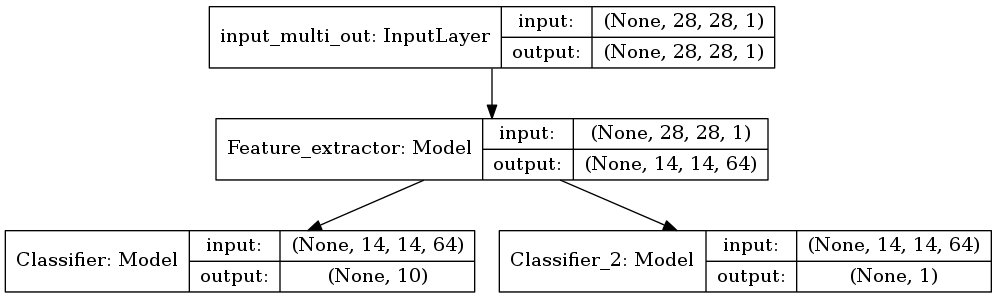

In [36]:
vizu_model(stacked_model_multi_out)

In [37]:
hist_stacked_model = stacked_model_multi_out.fit(X_train[:, :, :, None], [Y_train, sup_two_train], batch_size=batch_size, nb_epoch=nb_epoch,
                      verbose=1, validation_data=(X_test[:1000, :, :, None], [Y_test[:1000], sup_two_test[:1000]]))

Train on 60000 samples, validate on 1000 samples
Epoch 1/5
60000/60000 [==============================] - 7s - loss: 0.4927 - Classifier_loss: 0.2906 - Classifier_2_loss: 0.2022 - Classifier_acc: 0.9122 - Classifier_2_acc: 0.9288 - val_loss: 0.2519 - val_Classifier_loss: 0.1581 - val_Classifier_2_loss: 0.0938 - val_Classifier_acc: 0.9440 - val_Classifier_2_acc: 0.9690
Epoch 2/5
60000/60000 [==============================] - 6s - loss: 0.3961 - Classifier_loss: 0.2784 - Classifier_2_loss: 0.1178 - Classifier_acc: 0.9157 - Classifier_2_acc: 0.9592 - val_loss: 0.2261 - val_Classifier_loss: 0.1512 - val_Classifier_2_loss: 0.0749 - val_Classifier_acc: 0.9480 - val_Classifier_2_acc: 0.9740
Epoch 3/5
60000/60000 [==============================] - 6s - loss: 0.3645 - Classifier_loss: 0.2654 - Classifier_2_loss: 0.0991 - Classifier_acc: 0.9199 - Classifier_2_acc: 0.9661 - val_loss: 0.2016 - val_Classifier_loss: 0.1370 - val_Classifier_2_loss: 0.0646 - val_Classifier_acc: 0.9560 - val_Classifier

## Are the layers really frozen?

In [57]:
np.allclose(p_0, features_extractor.predict(X_train[:3][:, :, :, None]))

False

## Multi inputs multi outputs model 

In [47]:
# Prepare data
def shuffle_data():
    index_1_tr = range(len(X_train))
    np.random.shuffle(index_1_tr)

    index_1_te = range(len(X_test))
    np.random.shuffle(index_1_te)

    add_out_train = y_train[index_1_tr] + y_train
    add_out_test = y_test[index_1_te] + y_test
    
    return index_1_tr, index_1_te, add_out_train, add_out_test

index_1_tr, index_1_te, add_out_train, add_out_test = shuffle_data()

In [42]:
add_out_train

array([12,  2,  9, ..., 10, 14,  8], dtype=uint8)

In [69]:
# Build the addition Model

dense_concat = Dense(128)            # first hidden layer of the regressor
act_concat = Activation('relu')      # rectifier
do_concat = Dropout(0.5)             # regularization
dense_concat_2 = Dense(64)           # second hidden layer of the regressor
act_concat_2 = Activation('relu')    # rectifier
do_concat_2 = Dropout(0.5)           # regularization
dense_concat_out_sup_two = Dense(1)  # linear output to predict the result of the addition
layers = [dense_concat, act_concat, do_concat,
          dense_concat_2, act_concat_2, do_concat_2,
          dense_concat_out_sup_two]
addition_out = make_model((40, ), layers, 'Addition_Model_part_2')

In [68]:
# Build the features concatenation Model

fl_add = Flatten()                # we flatten the image
dense_add = Dense(256)            # first hidden layer of the regressor
act_add = Activation('relu')      # rectifier
do_add = Dropout(0.5)             # regularization
dense_add_2 = Dense(512)          # second hidden layer of the regressor
act_add_2 = Activation('relu')    # rectifier
do_add_2 = Dropout(0.5)           # regularization
inter_dense = Dense(20)           # last intermediate layer
act_add_3 = Activation('relu')    # rectifier
layers = [fl_add, dense_add, act_add, do_add,
          dense_add_2, act_add_2, do_add_2,
          inter_dense, act_add_3]
addition_features = make_model((14, 14, 128), layers, 'Addition_Model_part_1')


In [70]:
from keras.layers import merge                         # import the merge function

# Build the stacked multi in out Model

features_extractor.trainable = True                    # reactivate the layers of this model

inputs_add_1 = Input(shape=input_shape, name='num_1')  # image 1
inputs_add_2 = Input(shape=input_shape, name='num_2')  # image 2

x_1 = features_extractor(inputs_add_1)                 # apply the feature extractor on the 1st image
d_1 = classifier(x_1)                                  # predict probabilities

x_2 = features_extractor(inputs_add_2)                 # apply the feature extractor on the 2nd image
d_2 = classifier(x_2)                                  # predict probabilities

x_1_2 = merge([x_1, x_2], mode='concat', 
              concat_axis=-1)                          # merge the two set of features on the last axis
                                                       # (None, 14, 14, 64)|(None, 14, 14, 64)=>(None, 14, 14, 128)
int_output = addition_features(x_1_2)                  # apply the addition model to the concat features

xy_1_2 = merge([int_output, d_1, d_2], 
               mode='concat', concat_axis=-1)

output_add = addition_out(xy_1_2)

multi_in_out = Model([inputs_add_1, inputs_add_2], [d_1, d_2, output_add])

In [71]:
multi_in_out.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
num_1 (InputLayer)               (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
num_2 (InputLayer)               (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
Feature_extractor (Model)        (None, 14, 14, 64)    75072       num_1[0][0]                      
                                                                   num_2[0][0]                      
____________________________________________________________________________________________________
merge_3 (Merge)                  (None, 14, 14, 128)   0           Feature_extractor[9][0] 

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



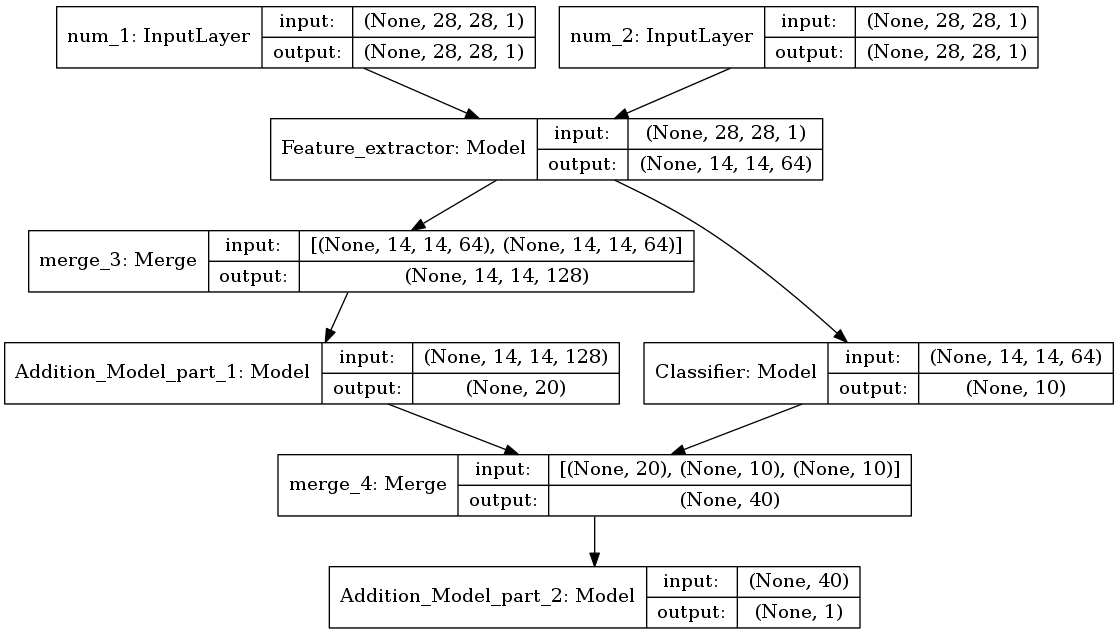

In [75]:
vizu_model(multi_in_out)

In [72]:
multi_in_out.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'mse'],
              optimizer='adam',
              metrics=['accuracy'])

for i in range(10):
    index_1_tr, index_1_te, add_out_train, add_out_test = shuffle_data()
    inputs_train = [X_train[index_1_tr, :, :, None], X_train[:, :, :, None]]
    outputs_train = [Y_train[index_1_tr], Y_train, add_out_train]

    inputs_test = [X_test[index_1_te, :, :, None], X_test[:, :, :, None]]
    outputs_test = [Y_test[index_1_te], Y_test, add_out_test]
    
    hist_stacked_model = multi_in_out.fit(inputs_train, outputs_train, batch_size=batch_size, nb_epoch=1,
                          verbose=1, validation_data=(inputs_test, outputs_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 34s - loss: 8.3925 - Classifier_loss_1: 0.0031 - Classifier_loss_2: 0.0033 - Addition_Model_part_2_loss: 8.3861 - Classifier_acc_1: 0.9992 - Classifier_acc_2: 0.9990 - Addition_Model_part_2_acc: 0.1895 - val_loss: 1.1445 - val_Classifier_loss_1: 0.0351 - val_Classifier_loss_2: 0.0351 - val_Addition_Model_part_2_loss: 1.0744 - val_Classifier_acc_1: 0.9930 - val_Classifier_acc_2: 0.9930 - val_Addition_Model_part_2_acc: 0.2412
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 32s - loss: 3.4057 - Classifier_loss_1: 0.0055 - Classifier_loss_2: 0.0051 - Addition_Model_part_2_loss: 3.3952 - Classifier_acc_1: 0.9985 - Classifier_acc_2: 0.9983 - Addition_Model_part_2_acc: 0.2778 - val_loss: 0.6286 - val_Classifier_loss_1: 0.0440 - val_Classifier_loss_2: 0.0440 - val_Addition_Model_part_2_loss: 0.5406 - val_Classifier_acc_1: 0.9923 -

In [74]:
nb_preds = 20
preds = multi_in_out.predict([X_test[index_1_te, :, :, None][:nb_preds], X_test[:nb_preds, :, :, None]])
for i in range(nb_preds):
    print('{} + {} = {:^2} | {} + {} = {:^3.1f}'.format(y_test[index_1_te][i], 
                                                        y_test[i], 
                                                        add_out_test[i],
                                                        np.argmax(preds[0][i]),
                                                        np.argmax(preds[1][i]),
                                                        preds[2][i][0]))

5 + 7 = 12 | 5 + 7 = 11.6
9 + 2 = 11 | 9 + 2 = 10.8
0 + 1 = 1  | 0 + 1 = 1.7
8 + 0 = 8  | 8 + 0 = 7.7
7 + 4 = 11 | 7 + 4 = 10.7
0 + 1 = 1  | 0 + 1 = 1.7
1 + 4 = 5  | 1 + 4 = 5.0
1 + 9 = 10 | 1 + 9 = 9.5
9 + 5 = 14 | 9 + 5 = 13.6
3 + 9 = 12 | 3 + 9 = 11.6
8 + 0 = 8  | 8 + 0 = 7.7
0 + 6 = 6  | 0 + 6 = 6.0
1 + 9 = 10 | 1 + 9 = 9.5
3 + 0 = 3  | 3 + 0 = 3.2
4 + 1 = 5  | 4 + 1 = 5.0
8 + 5 = 13 | 8 + 5 = 12.5
1 + 9 = 10 | 1 + 9 = 9.5
2 + 7 = 9  | 2 + 7 = 8.8
6 + 3 = 9  | 6 + 3 = 8.7
8 + 4 = 12 | 8 + 4 = 11.6


# Conclusion

- choose a NN library
- MLP, convnet
- build models with multiple levels of abstraction

# Thank you! 

# Ressources 

- [Keras documentation](keras.io)
- [examples from the library](https://github.com/fchollet/keras/tree/master/examples)
- [keras-ressources](https://github.com/fchollet/keras-resources)
- [keras-blog](https://blog.keras.io/)
- [filter and outputs vizualisation](https://github.com/julienr/ipynb_playground/blob/master/keras/convmnist/keras_cnn_mnist.ipynb)
- [Deep learning with Keras (Tutorial @ EuroScipy 2016)](https://github.com/leriomaggio/deep-learning-keras-tensorflow)
- [Deep Learning: Keras Short Tutorial [video]](https://www.youtube.com/watch?v=Tp3SaRbql4k)